# Image Classification by MLP - Fashion MNIST

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

We will first download the data:

In [3]:
## Importing libraries ##
import tensorflow
import os
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [6]:
## load dataset ##
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Resample the dataset if needed ##
#X_train = ...
#y_train = ...
#X_test = ...
#y_test = ...

X_train.shape

(60000, 28, 28)

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

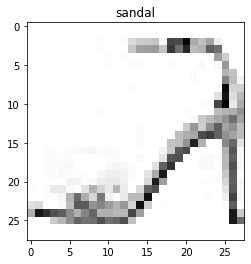

In [7]:
## Explore the data, display some input images ##
%matplotlib inline

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# np.random.seed(0)
idx = np.random.randint(x_train.shape[0])

plt.imshow(x_train[idx],cmap="gray_r")
plt.title(label_class[y_train[idx]])
plt.show()

**Before going further**: what methods could you use to perform such a classification task?

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [17]:
## Make the data preparation ##

y_train_cat = to_categorical(y_train,num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

x_train_norm = x_train/255
x_test_norm = x_test/255

## Reshape the image data (2D array) into input 1D array for a neural network ##
print(np.shape(x_train_norm))
x_train_norm = x_train_norm.reshape(x_train.shape[0],np.prod(x_train_norm.shape[1:]))
                
print(np.shape(x_train_norm))
x_test_norm = x_test_norm.reshape(x_test.shape[0],np.prod(x_test_norm.shape[1:]))

(60000, 28, 28)
(60000, 784)


Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: no more than 2 hidden layers, with about 10 units per layer. Put that model into a function, so that you can reuse it later.

In [23]:
## Building the model ##

def my_model(input_dim):
    # Create the Sequential object
    model = Sequential()

    # Add 2 dense layers with 10 neurons each using sigmoid or relu activation
    model.add(Dense(10,input_dim=input_dim, activation="sigmoid"))
    model.add(Dense(10, activation="sigmoid"))
    
    # Add the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))
    
    return model

my_model(x_train_norm.shape[1]).summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [24]:
#https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
# os.environ['KMP_DUPLICATE_LIB_OK']='True' 

## Compile and fit your model ##
model = my_model(x_train_norm.shape[1])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train_cat, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 766us/step - loss: 1.9686 - accuracy: 0.4094
Epoch 2/25
469/469 [==============================] - 0s 765us/step - loss: 1.4797 - accuracy: 0.5564
Epoch 3/25
469/469 [==============================] - 0s 769us/step - loss: 1.1071 - accuracy: 0.7242
Epoch 4/25
469/469 [==============================] - 0s 774us/step - loss: 0.8518 - accuracy: 0.7832
Epoch 5/25
469/469 [==============================] - 0s 774us/step - loss: 0.7041 - accuracy: 0.8012
Epoch 6/25
469/469 [==============================] - 0s 754us/step - loss: 0.6217 - accuracy: 0.8112
Epoch 7/25
469/469 [==============================] - 0s 760us/step - loss: 0.5686 - accuracy: 0.8233
Epoch 8/25
469/469 [==============================] - 0s 755us/step - loss: 0.5324 - accuracy: 0.8339
Epoch 9/25
469/469 [==============================] - 0s 757us/step - loss: 0.5030 - accuracy: 0.8417
Epoch 10/25
469/469 [==============================] - 0s 762us/step - loss: 0.479

Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [26]:
## Compute the accuracy of your model ##
print('accuracy on train with NN:', model.evaluate(x_train_norm, y_train_cat, verbose=0)[1])
print('accuracy on test with NN:', model.evaluate(x_test_norm, y_test_cat, verbose=0)[1])

accuracy on train with NN: 0.8784999847412109
accuracy on test with NN: 0.8508999943733215


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

You should try!

---

In order to compare your results with more traditional machine learning methods, you will do this work with another method: a PCA followed by a classification model (of your choice). Of course, you can perform hyperparameter optimization using a gridsearch on that model!

Fit your model and display the performances.

In [31]:
## Redo the classification with PCA and classification model ##
pca = PCA(n_components=0.9)

pca.fit(x_train_norm)
x_train_pca = pca.transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)

In [32]:
## Use any classifier you want ##
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

## Print out data scores ##
print('score with RF on train', rf.score(x_train_pca, y_train))
print('score with RF on train', rf.score(x_test_pca, y_test))

score with RF on train 1.0
score with RF on train 0.861


Are the performances different? Can you explain why?

If you still have time, you could try to use scikit-learn's `Pipeline` to perform the hyperparameter optimization jointly on the PCA and the classification model. This might improve your performances.